In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("female_births.csv")
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [3]:
df.set_index('Date',inplace=True)

In [4]:
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<Axes: xlabel='Date'>

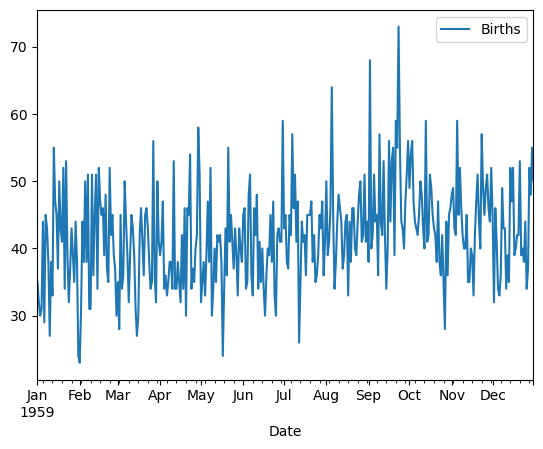

In [7]:
df.plot()

In [19]:
from statsmodels.tsa.stattools import kpss

In [20]:
p=kpss(df['Births'])
p

C:\Users\Sanjana Shankar\AppData\Local\Temp\ipykernel_26308\1504293015.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  p=kpss(df['Births'])


(1.6129657593856856,
 0.01,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [10]:
p[0]

-4.808291253559765

In [17]:
dict=p[4]

In [18]:
for i in dict.keys():
    print(i + ':' +str(dict[i]))

1%:-3.448748905151901
5%:-2.8696473721448728
10%:-2.5710891239349585


In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Births'],model='additive',period=100 )

In [34]:
trend = decomposition.trend

In [35]:
seasonal = decomposition.seasonal

In [36]:
residual = decomposition.resid

(array([-3959., -3928., -3898., -3867., -3837., -3806., -3775., -3745.,
        -3714.]),
 [Text(-3959.0, 0, '1959-03'),
  Text(-3928.0, 0, '1959-04'),
  Text(-3898.0, 0, '1959-05'),
  Text(-3867.0, 0, '1959-06'),
  Text(-3837.0, 0, '1959-07'),
  Text(-3806.0, 0, '1959-08'),
  Text(-3775.0, 0, '1959-09'),
  Text(-3745.0, 0, '1959-10'),
  Text(-3714.0, 0, '1959-11')])

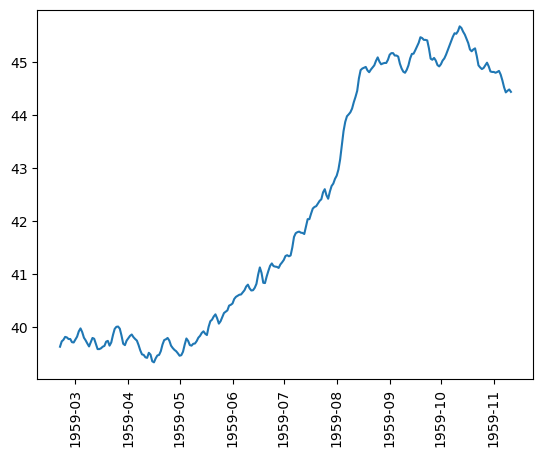

In [40]:
plt.plot(trend)
plt.xticks(rotation=90)

(array([-4018., -3959., -3898., -3837., -3775., -3714., -3653.]),
 [Text(-4018.0, 0, '1959-01'),
  Text(-3959.0, 0, '1959-03'),
  Text(-3898.0, 0, '1959-05'),
  Text(-3837.0, 0, '1959-07'),
  Text(-3775.0, 0, '1959-09'),
  Text(-3714.0, 0, '1959-11'),
  Text(-3653.0, 0, '1960-01')])

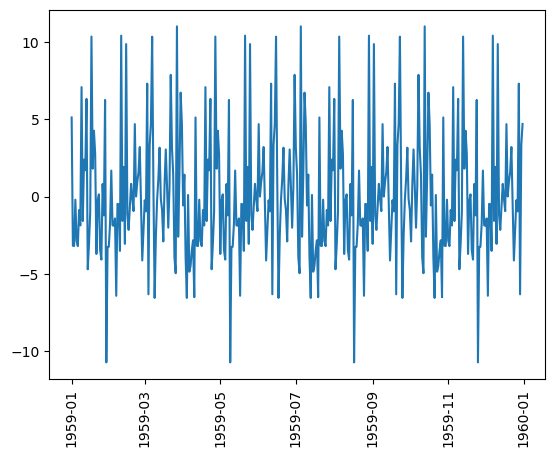

In [41]:
plt.plot(seasonal)
plt.xticks(rotation=90)

(array([-3959., -3928., -3898., -3867., -3837., -3806., -3775., -3745.,
        -3714.]),
 [Text(-3959.0, 0, '1959-03'),
  Text(-3928.0, 0, '1959-04'),
  Text(-3898.0, 0, '1959-05'),
  Text(-3867.0, 0, '1959-06'),
  Text(-3837.0, 0, '1959-07'),
  Text(-3806.0, 0, '1959-08'),
  Text(-3775.0, 0, '1959-09'),
  Text(-3745.0, 0, '1959-10'),
  Text(-3714.0, 0, '1959-11')])

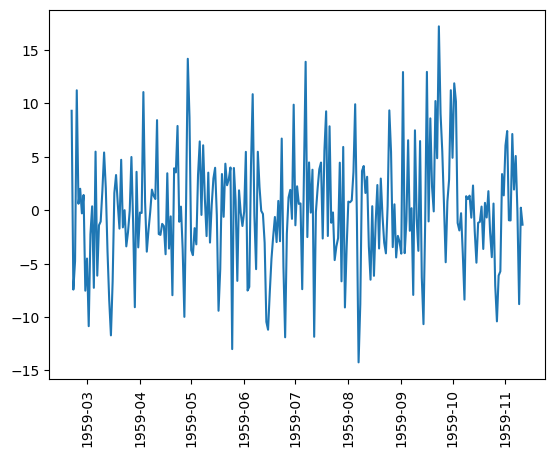

In [42]:
plt.plot(residual)
plt.xticks(rotation=90)